In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/youssefekrami919/IRS-Assignment-1/main/ratings_Electronics%20(1000%20sample).csv"
df = pd.read_csv(url)

print(df.head(10))


           userId    movieId  rating
0  A2CX7LUOHB2NDG  321732944       5
1  A2NWSAGRHCP8N5  439886341       1
2  A2WNBOD3WNDNKT  439886341       3
3  A1GI0U4ZRJA8WN  439886341       1
4  A1QGNMC6O1VW39  511189877       5
5  A3J3BRHTDRFJ2G  511189877       2
6  A2TY0BTJOTENPG  511189877       5
7  A34ATBPOK6HCHY  511189877       5
8   A89DO69P0XZ27  511189877       5
9   AZYNQZ94U6VDB  511189877       5


### 1.Prepare a dataset of at least 100,000 users, > 1000 products, and > 1 million ratings.

In [3]:
# 1. Print the number of users
num_users = df['userId'].nunique()
print("Number of users:", num_users)

# 2. Print the number of items
num_items = df['movieId'].nunique()
print("Number of items:", num_items)

# 2. Print the number of ratings
num_ratings = len(df)
print("Number of ratings:", num_ratings)

Number of users: 1006
Number of items: 38
Number of ratings: 1006


### 3. Calculate the number of ratings for each user (nu) and save it


In [4]:
nu = df.groupby('userId').size()
print("\nNumber of ratings per user (nu):")
print(nu.head())


Number of ratings per user (nu):
userId
A030530627MK66BD8V4LN    1
A1038957GWRBP375RU5T     1
A106YUCY4SVX1D           1
A1079KKA0AXSL3           1
A107S4MT25VXQ5           1
dtype: int64


### 4. Calculate the number of ratings for each item (ni) and save it


In [6]:
ni = df.groupby('movieId').size()
print("\nNumber of ratings per item (ni):")
print(ni.head())



Number of ratings per item (ni):
movieId
059400232X    3
089933623X    2
094339676X    1
321732944     1
439886341     3
dtype: int64


### 5. Compute the average ratings per user (ru) and save it


In [7]:

average_ru = df.groupby('userId')['rating'].mean()
print("\nAverage ratings per user (ru):")
print(average_ru.head(100))



Average ratings per user (ru):
userId
A030530627MK66BD8V4LN    4.0
A1038957GWRBP375RU5T     5.0
A106YUCY4SVX1D           5.0
A1079KKA0AXSL3           4.0
A107S4MT25VXQ5           5.0
                        ... 
A1BAAIX0K2960C           5.0
A1BFGWPAR3XE0Y           5.0
A1BKC6B7YHYTVV           4.0
A1BMBZNUA3H10M           4.0
A1BV6SSYN6ITUD           5.0
Name: rating, Length: 100, dtype: float64


### 6. Compute the average ratings per item (ri) and save it


In [8]:

average_ri = df.groupby('movieId')['rating'].mean()
print("\nAverage ratings per item (ri):")
print(average_ri.head(10))


Average ratings per item (ri):
movieId
059400232X    5.000000
089933623X    2.500000
094339676X    5.000000
321732944     5.000000
439886341     1.666667
511189877     4.500000
528881469     2.851852
558835155     3.000000
594012015     2.000000
594017343     1.000000
Name: rating, dtype: float64


Ratings per item sorted ascendingly:
movieId
594450705       1
594514789       1
594287995       1
594202442       1
594549507       1
594478162       1
594017580       1
594017343       1
594549558       1
558835155       1
840017677       1
321732944       1
094339676X      1
594482127       1
777700018       2
594033934       2
089933623X      2
594450209       2
970408005       2
594514681       2
594511488       2
743610431       2
879393742       3
059400232X      3
594477670       3
439886341       3
594033896       5
970407998       5
594296420       6
511189877       6
594012015       8
899336795      10
594481902      13
594451647      14
594033926      15
528881469      27
594481813      31
972683275     824
dtype: int64


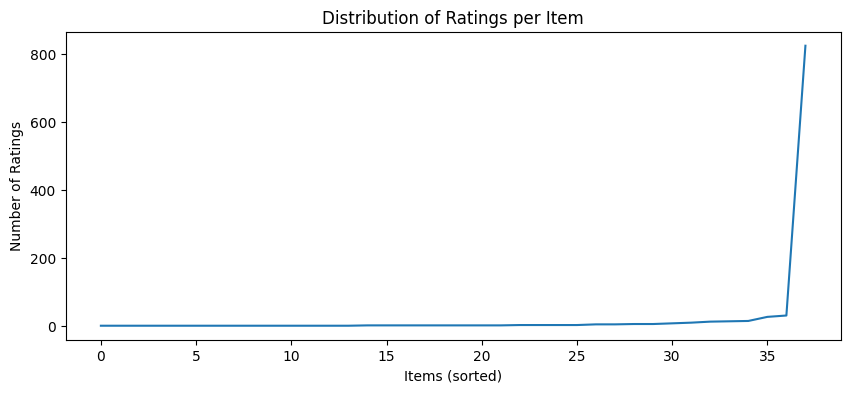

In [10]:
### 7. Ascendingly order the total number of ratings per item and plot the distribution per item

# Total number of ratings per item (ni already computed previously)
ni_sorted = ni.sort_values(ascending=True)
print("Ratings per item sorted ascendingly:")
print(ni_sorted.head(700))

# Plot the distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(ni_sorted.values)
plt.title("Distribution of Ratings per Item")
plt.xlabel("Items (sorted)")
plt.ylabel("Number of Ratings")
plt.show()


In [ ]:
#hamda2